# House Recommendation System

<a id="lib"></a>
## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from sklearn.decomposition import KernelPCA
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

plt.rcParams['figure.figsize']=[12,8]

<a id="prep"></a>
## 3. Data Preperation

<a id="read"></a>
## 3.1 Read Data

In [2]:
df=pd.read_csv('../Dataset/Egyption.csv')
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City,Price_range
0,Apartment,4000000,3,3,160,No,11,Cash,Finished,Camp Caesar,high Price
1,Apartment,2250000,3,2,165,No,1,Cash,Finished,Smoha,Mid Price
2,Apartment,1900000,3,2,230,No,10,Cash,Finished,Nasr City,Mid Price
3,Apartment,5800000,2,3,160,No,0,Cash,Semi Finished,New Cairo - El Tagamoa,high Price
4,Apartment,1844900,4,3,222,No,1,Cash or Installment,Semi Finished,New Cairo - El Tagamoa,Mid Price


In [3]:
df.tail()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Term,City,Price_range
16053,Twin House,12284000,4,4,337,No,0,Cash or Installment,Not Finished,Sheikh Zayed,high Price
16054,Stand Alone Villa,16500000,4,4,620,No,0,Cash,Semi Finished,New Cairo - El Tagamoa,high Price
16055,Stand Alone Villa,16000000,5,5,530,No,0,Cash,Finished,New Cairo - El Tagamoa,high Price
16056,Stand Alone Villa,4800000,4,3,165,No,0,Cash or Installment,Semi Finished,New Cairo - El Tagamoa,high Price
16057,Twin House,13800000,3,4,308,No,0,Cash,Semi Finished,New Cairo - El Tagamoa,high Price


In [4]:
df.shape

(16058, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16058 entries, 0 to 16057
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            16058 non-null  object
 1   Price           16058 non-null  int64 
 2   Bedrooms        16058 non-null  int64 
 3   Bathrooms       16058 non-null  int64 
 4   Area            16058 non-null  int64 
 5   Furnished       16058 non-null  object
 6   Level           16058 non-null  int64 
 7   Payment_Option  16058 non-null  object
 8   Delivery_Term   16058 non-null  object
 9   City            16058 non-null  object
 10  Price_range     16058 non-null  object
dtypes: int64(5), object(6)
memory usage: 1.3+ MB


## Numerical Variables

In [6]:
df_cat=df.select_dtypes(object)
df_cat.head(1)

,Type,Furnished,Payment_Option,Delivery_Term,City,Price_range
0,Apartment,No,Cash,Finished,Camp Caesar,high Price


In [7]:
df_num=df.select_dtypes(np.number)
df_num.head(1)

,Price,Bedrooms,Bathrooms,Area,Level
0,4000000,3,3,160,11


In [8]:
imputer = KNNImputer()

# fit on the dataset
imputer.fit(df_num)

# transform the dataset
df_num_impute = pd.DataFrame(imputer.transform(df_num),columns=df_num.columns)

In [9]:
df=pd.concat([df_cat,df_num_impute],axis=1)

<Axes: >

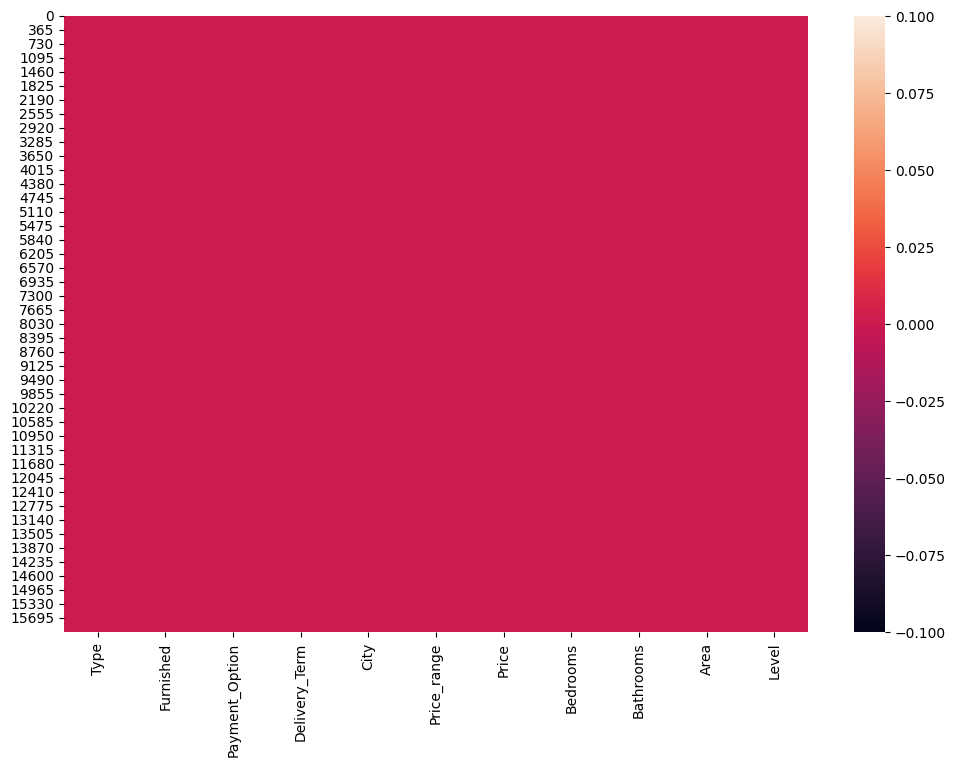

In [10]:
sns.heatmap(df.isnull())

<a id="outliers"></a>
## 3.3 Removing Outliers

<Axes: >

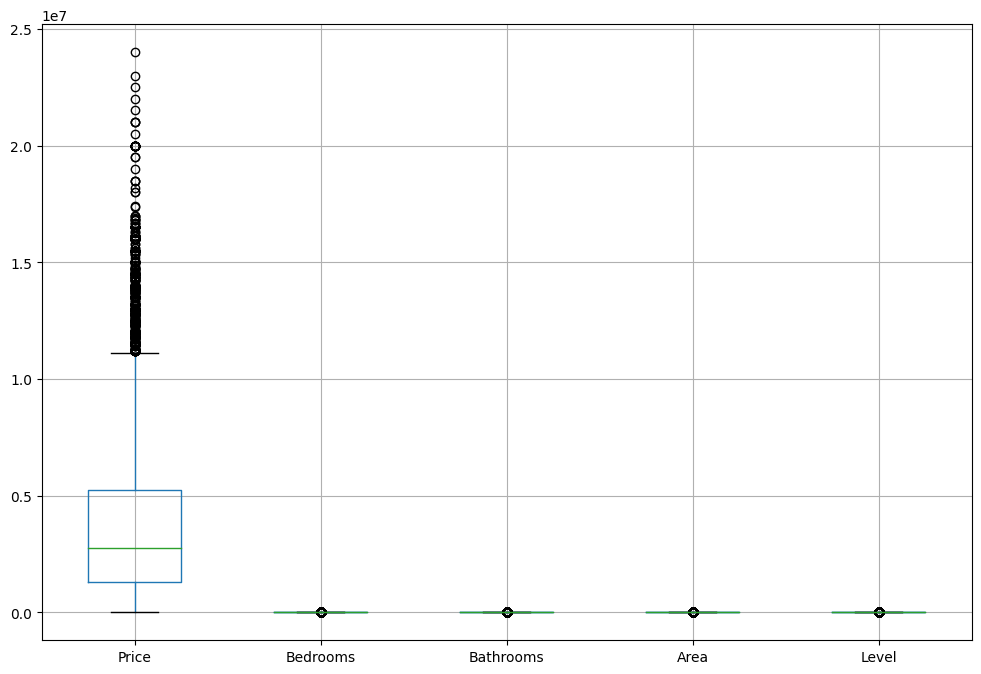

In [11]:
df.boxplot()

In [12]:
df.shape
df.head()

,Type,Furnished,Payment_Option,Delivery_Term,City,Price_range,Price,Bedrooms,Bathrooms,Area,Level
0,Apartment,No,Cash,Finished,Camp Caesar,high Price,4000000.0,3.0,3.0,160.0,11.0
1,Apartment,No,Cash,Finished,Smoha,Mid Price,2250000.0,3.0,2.0,165.0,1.0
2,Apartment,No,Cash,Finished,Nasr City,Mid Price,1900000.0,3.0,2.0,230.0,10.0
3,Apartment,No,Cash,Semi Finished,New Cairo - El Tagamoa,high Price,5800000.0,2.0,3.0,160.0,0.0
4,Apartment,No,Cash or Installment,Semi Finished,New Cairo - El Tagamoa,Mid Price,1844900.0,4.0,3.0,222.0,1.0


<a id="eda"></a>
## 4.EDA

<Axes: ylabel='Price'>

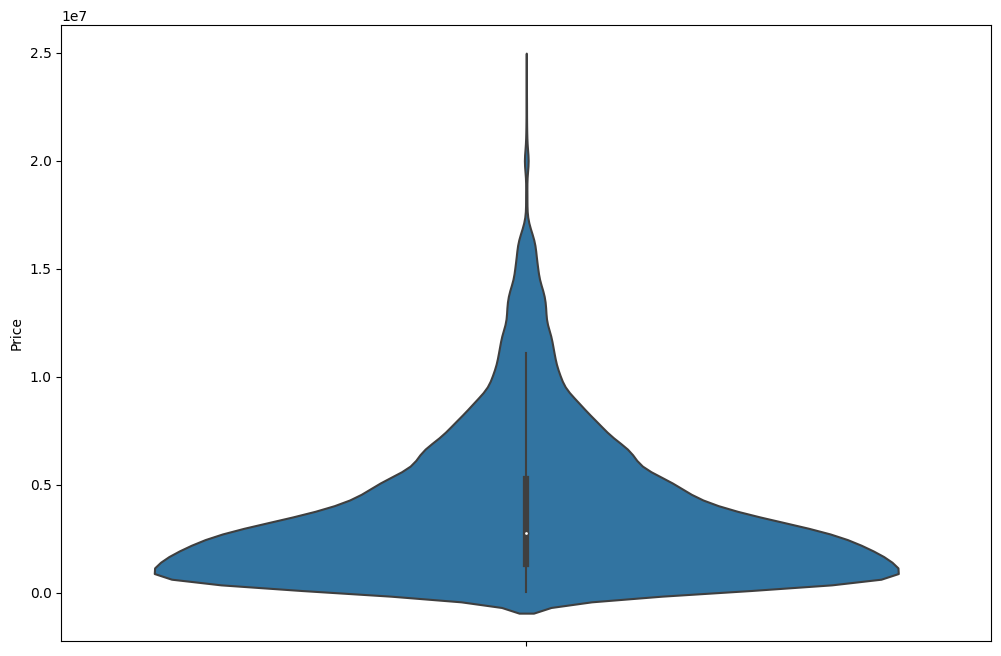

In [13]:
sns.violinplot(y = df.Price)

Text(0, 0.5, 'Delivery_Term of Rooms')

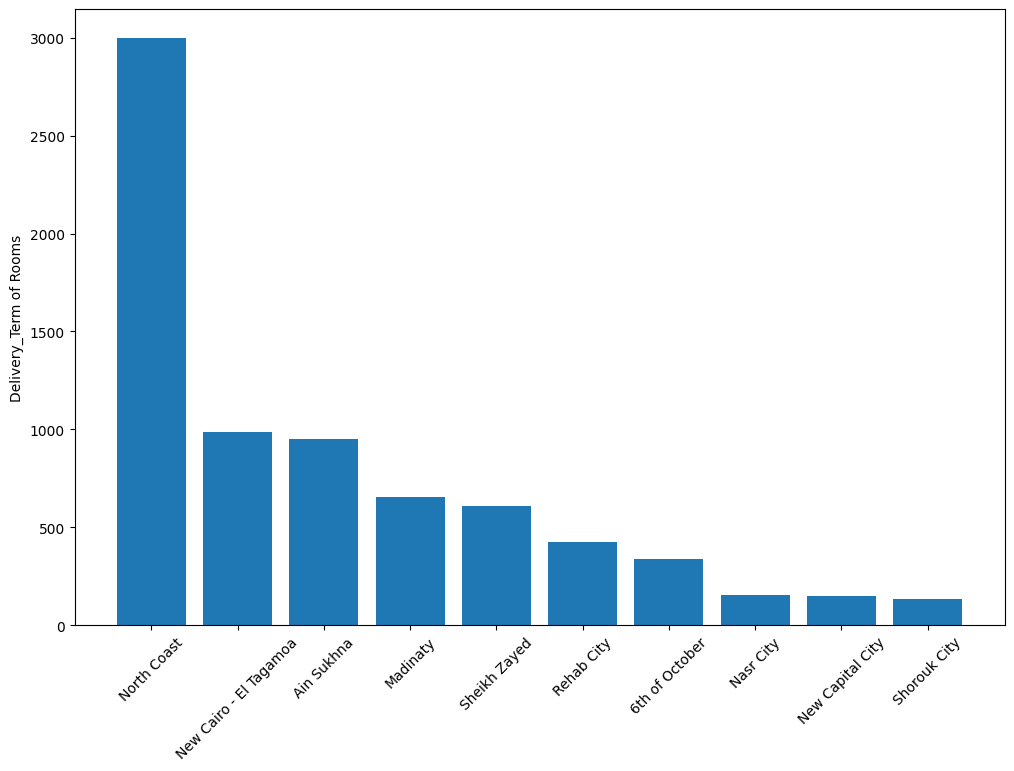

In [14]:
plt.bar(x=df[df['Delivery_Term'] == 'Finished'].groupby('City')['Delivery_Term'].agg('count').sort_values(ascending=False).head(10).index,height=df[df['Delivery_Term'] == 'Finished'].groupby('City')['Delivery_Term'].agg('count').sort_values(ascending=False).head(10))
plt.xticks(rotation=45)
plt.ylabel('Delivery_Term of Rooms')

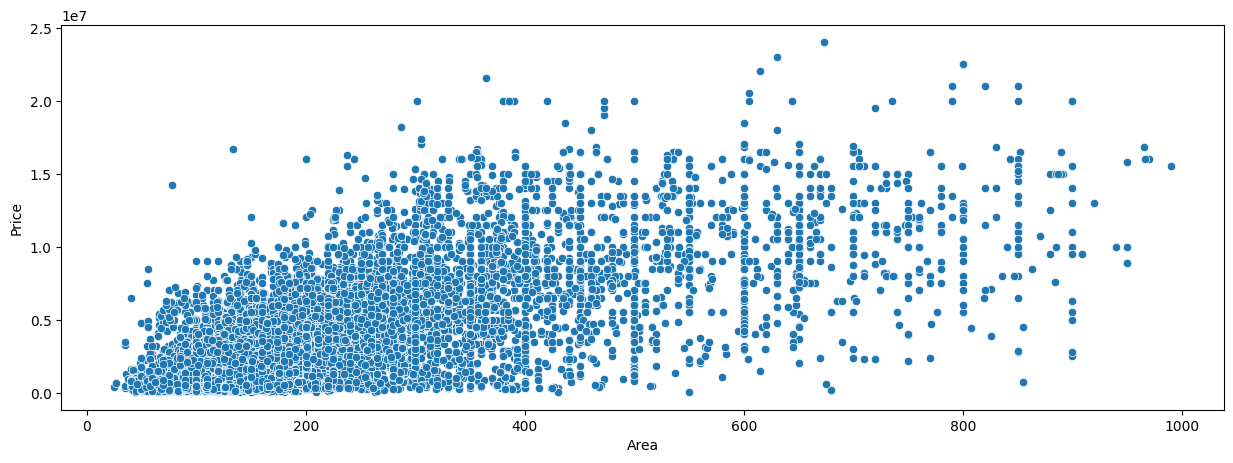

In [15]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="Area", y="Price", data=df)
plt.show()

Text(0.5, 0, 'Number of Bedrooms')

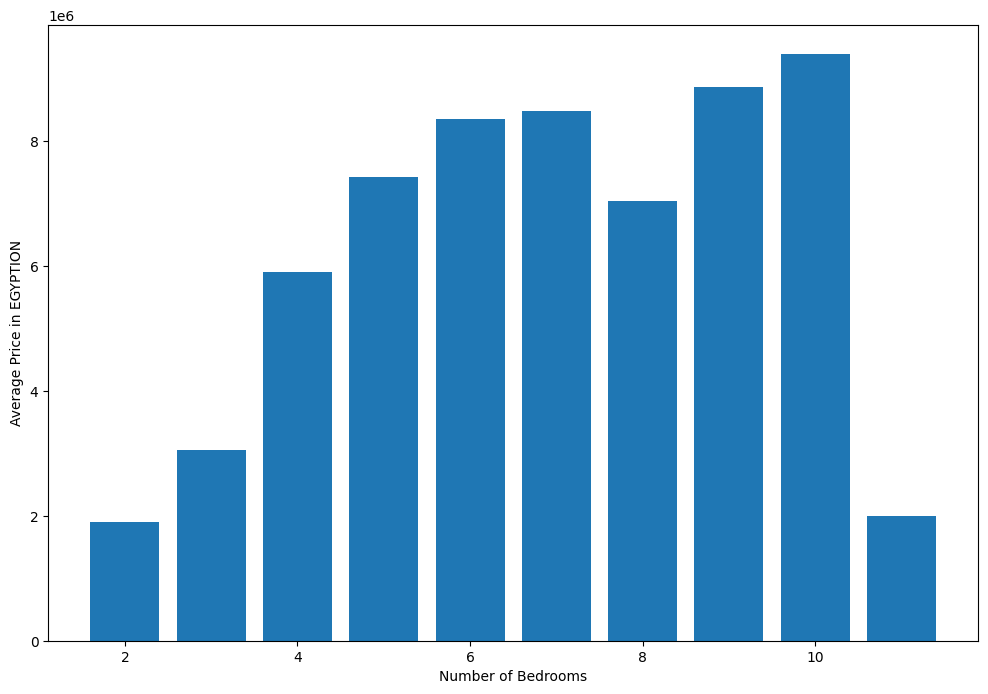

In [16]:
df10 = df.copy()
df10['Bedrooms'] = np.round(df10['Bedrooms'])
plt.bar(x=df10.groupby('Bedrooms')['Price'].agg('mean').sort_values(ascending=False).head(10).index,height=df10.groupby('Bedrooms')['Price'].agg('mean').sort_values(ascending=False).head(10))
plt.ylabel('Average Price in EGYPTION')
plt.xlabel('Number of Bedrooms')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Giza District'),
  Text(1, 0, 'Gouna'),
  Text(2, 0, 'Rehab City'),
  Text(3, 0, 'West Somid'),
  Text(4, 0, 'New Cairo - El Tagamoa'),
  Text(5, 0, 'Sheikh Zayed'),
  Text(6, 0, 'Mokattam'),
  Text(7, 0, 'Amreya'),
  Text(8, 0, 'San Stefano'),
  Text(9, 0, 'Shorouk City')])

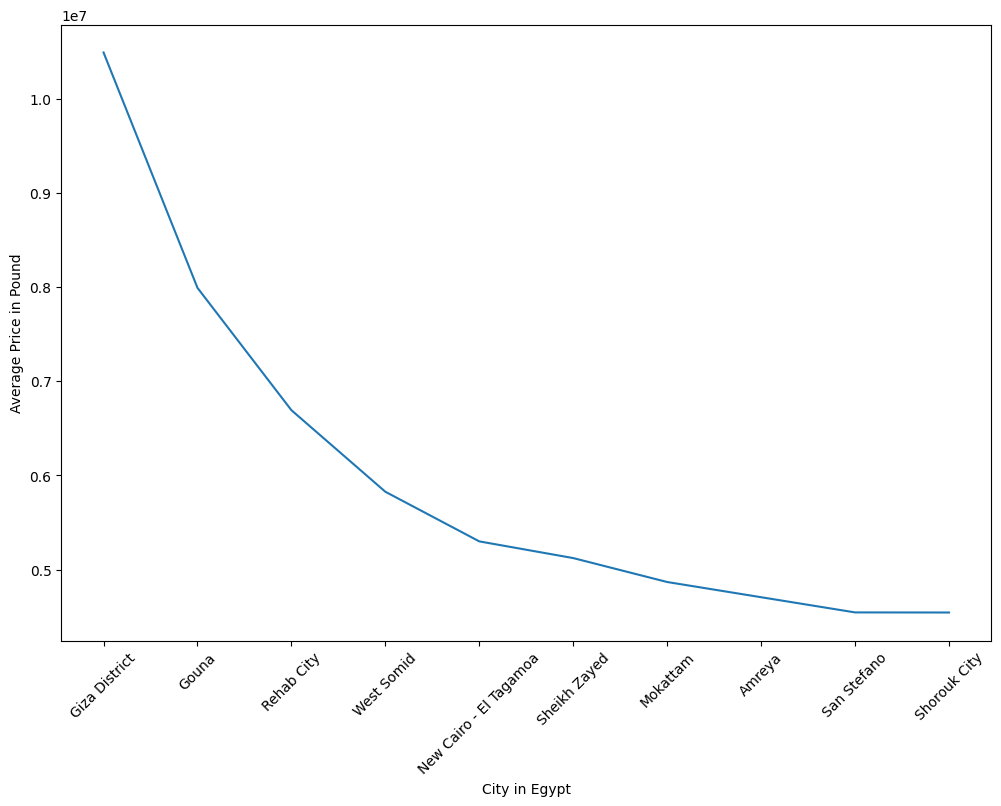

In [17]:
plt.plot(df.groupby(by='City')['Price'].agg('mean').sort_values(ascending=False).head(10))
plt.xlabel('City in Egypt')
plt.ylabel('Average Price in Pound')
plt.xticks(rotation=45)

C:\Users\Alaa El - Masry\AppData\Local\Temp\ipykernel_26816\3641096156.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cbar=False)


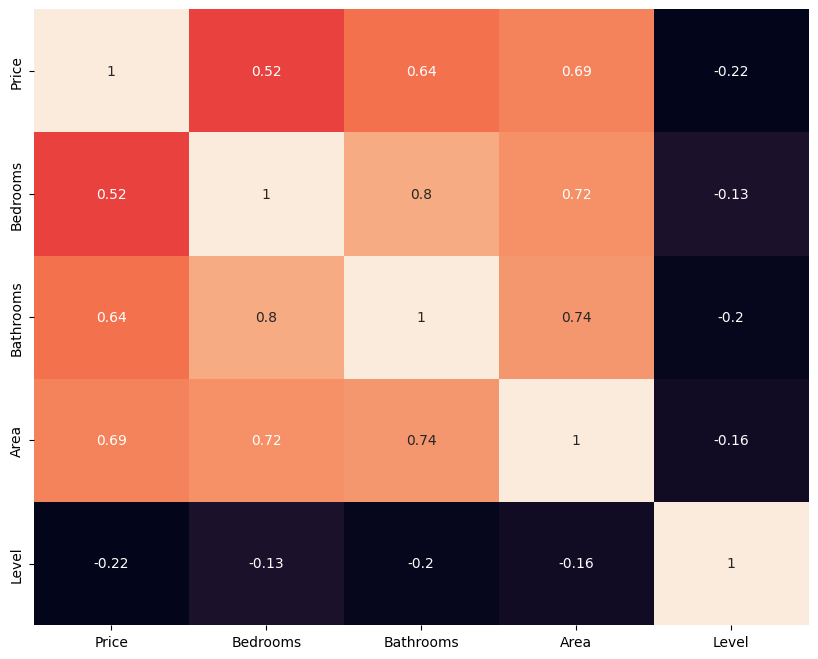

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cbar=False)
plt.show()

## Standardisation

In [19]:
df.head()

,Type,Furnished,Payment_Option,Delivery_Term,City,Price_range,Price,Bedrooms,Bathrooms,Area,Level
0,Apartment,No,Cash,Finished,Camp Caesar,high Price,4000000.0,3.0,3.0,160.0,11.0
1,Apartment,No,Cash,Finished,Smoha,Mid Price,2250000.0,3.0,2.0,165.0,1.0
2,Apartment,No,Cash,Finished,Nasr City,Mid Price,1900000.0,3.0,2.0,230.0,10.0
3,Apartment,No,Cash,Semi Finished,New Cairo - El Tagamoa,high Price,5800000.0,2.0,3.0,160.0,0.0
4,Apartment,No,Cash or Installment,Semi Finished,New Cairo - El Tagamoa,Mid Price,1844900.0,4.0,3.0,222.0,1.0


In [20]:
data_cat=df.select_dtypes(exclude=np.number)
data_num=df.select_dtypes(np.number)
data_cat=data_cat.reset_index()

In [21]:
ss=StandardScaler()
data_num_scaled=pd.DataFrame(ss.fit_transform(data_num),columns=data_num.columns)
data_num_scaled=data_num_scaled.reset_index()
data_num_scaled.head()

,index,Price,Bedrooms,Bathrooms,Area,Level
0,0,0.063972,-0.135322,0.231300,-0.399379,3.730063
1,1,-0.452745,-0.135322,-0.597211,-0.363729,-0.121609
2,2,-0.556089,-0.135322,-0.597211,0.099717,3.344896
3,3,0.595453,-1.061978,0.231300,-0.399379,-0.506776
4,4,-0.572358,0.791333,0.231300,0.042678,-0.121609


In [22]:
data_scaled=pd.concat([data_num_scaled,data_cat],axis=1).drop('index',axis=1)
data_scaled.head()

,Price,Bedrooms,Bathrooms,Area,Level,Type,Furnished,Payment_Option,Delivery_Term,City,Price_range
0,0.063972,-0.135322,0.231300,-0.399379,3.730063,Apartment,No,Cash,Finished,Camp Caesar,high Price
1,-0.452745,-0.135322,-0.597211,-0.363729,-0.121609,Apartment,No,Cash,Finished,Smoha,Mid Price
2,-0.556089,-0.135322,-0.597211,0.099717,3.344896,Apartment,No,Cash,Finished,Nasr City,Mid Price
3,0.595453,-1.061978,0.231300,-0.399379,-0.506776,Apartment,No,Cash,Semi Finished,New Cairo - El Tagamoa,high Price
4,-0.572358,0.791333,0.231300,0.042678,-0.121609,Apartment,No,Cash or Installment,Semi Finished,New Cairo - El Tagamoa,Mid Price


## Encoding

In [23]:

data_encoded_refernce=pd.get_dummies(df,columns=['Type','City','Furnished','Delivery_Term','Price_range','Payment_Option'])
data_encoded_refernce.head()

,Price,Bedrooms,Bathrooms,Area,Level,Type_Apartment,Type_Chalet,Type_Duplex,Type_Penthouse,Type_Stand Alone Villa,...,Delivery_Term_Finished,Delivery_Term_Not Finished,Delivery_Term_Semi Finished,Price_range_Low Price,Price_range_Mid Price,Price_range_high Price,Payment_Option_Cash,Payment_Option_Cash or Installment,Payment_Option_Installment,Payment_Option_Unknown Payment
0,4000000.0,3.0,3.0,160.0,11.0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2250000.0,3.0,2.0,165.0,1.0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,1900000.0,3.0,2.0,230.0,10.0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
3,5800000.0,2.0,3.0,160.0,0.0,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,1844900.0,4.0,3.0,222.0,1.0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [24]:
data_encoded_scaled=pd.get_dummies(data_scaled,columns=['Type','City','Furnished','Payment_Option','Delivery_Term','Price_range'])
data_encoded_scaled.head()

,Price,Bedrooms,Bathrooms,Area,Level,Type_Apartment,Type_Chalet,Type_Duplex,Type_Penthouse,Type_Stand Alone Villa,...,Payment_Option_Cash or Installment,Payment_Option_Installment,Payment_Option_Unknown Payment,Delivery_Term_Core & Shell,Delivery_Term_Finished,Delivery_Term_Not Finished,Delivery_Term_Semi Finished,Price_range_Low Price,Price_range_Mid Price,Price_range_high Price
0,0.063972,-0.135322,0.231300,-0.399379,3.730063,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,-0.452745,-0.135322,-0.597211,-0.363729,-0.121609,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,-0.556089,-0.135322,-0.597211,0.099717,3.344896,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0.595453,-1.061978,0.231300,-0.399379,-0.506776,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,-0.572358,0.791333,0.231300,0.042678,-0.121609,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


<a id="hier"></a>
# 5.Hierarchical Clustering

In [25]:
d1 = data_encoded_scaled.copy()

In [26]:
data_cluster=data_encoded_refernce.copy()

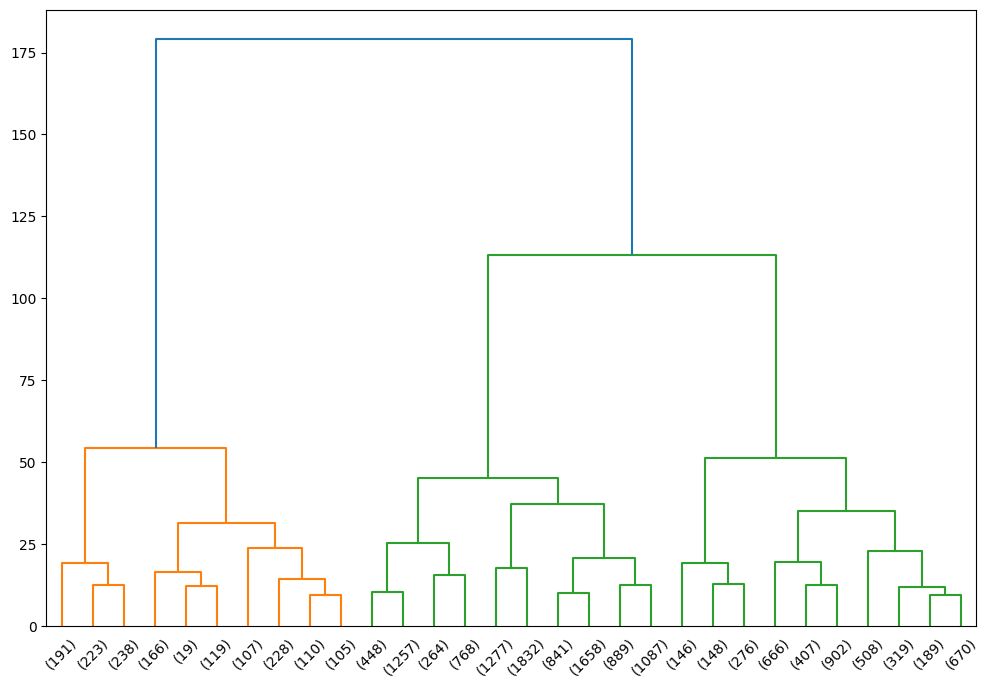

In [27]:
cls=d1[['Area','Price']]
mergings=linkage(cls,method='ward',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp')
plt.show()

In [28]:
cluster=cut_tree(mergings,n_clusters=3)

In [29]:
cluster_cut = pd.Series(cut_tree(mergings,n_clusters=3).reshape(-1))

In [30]:
cluster_cut.value_counts()

0    10321
1     4231
2     1506
dtype: int64

In [31]:
d1['cluster']=cluster

In [32]:
data_cluster['cluster']=cluster

<Axes: xlabel='Area', ylabel='Price'>

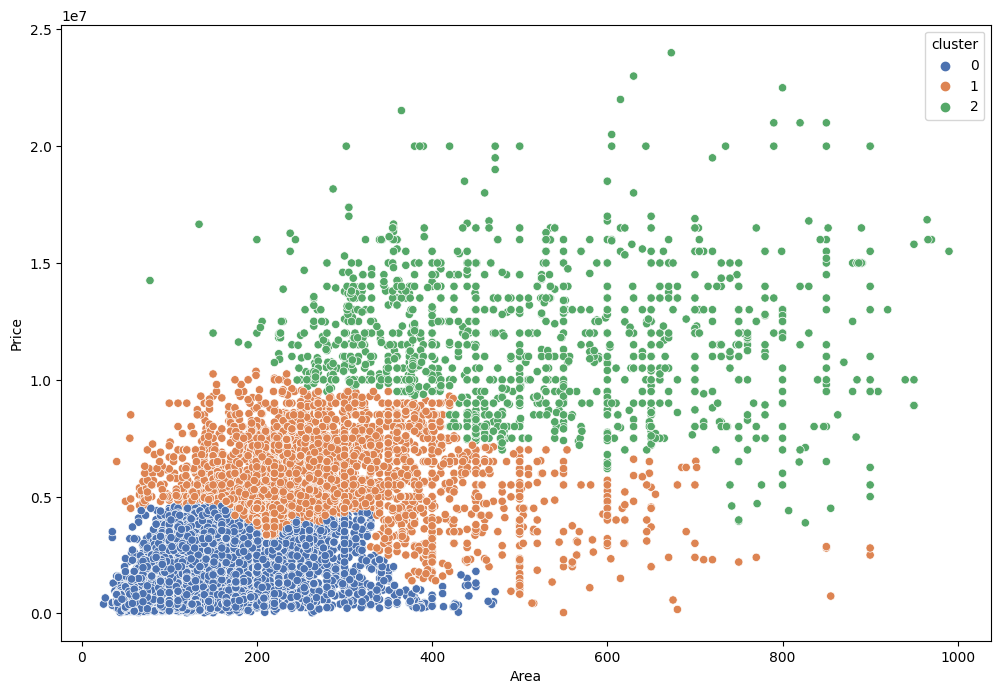

In [33]:
sns.scatterplot(y=df.Price,x=df['Area'],hue=data_cluster['cluster'],palette='deep')

<a id="kmeans"></a>
# 6.KMEANS Clustering

In [34]:
ssd = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    ssd.append(kmeans.inertia_)

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

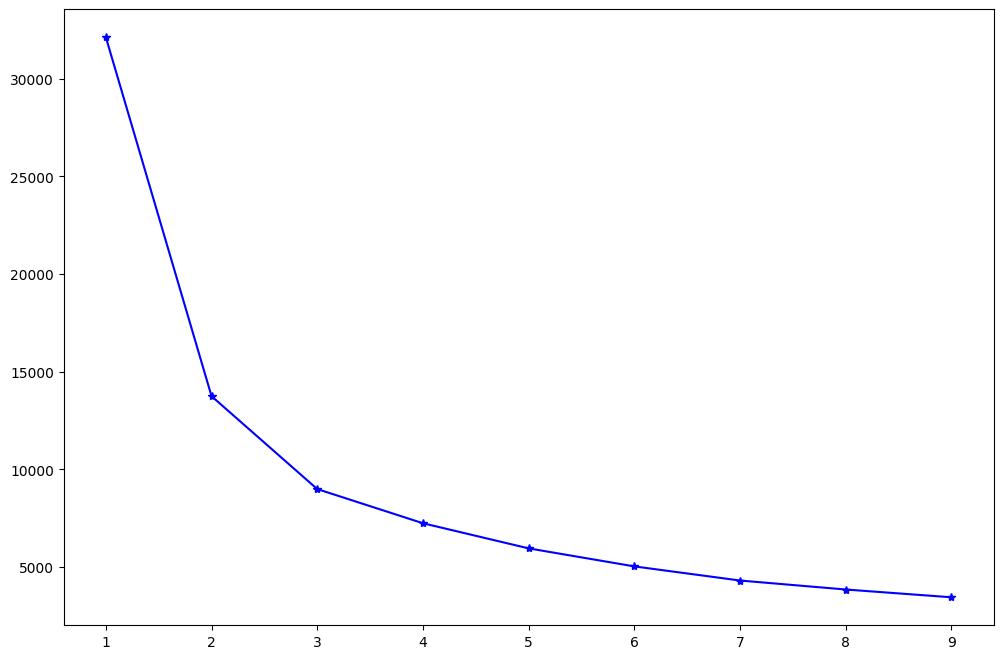

In [35]:
plt.plot(range(1,10),ssd,marker='*',color='b')

In [36]:
def svisualizer(x, ncluster):
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    import numpy as np
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    km = KMeans(n_clusters=ncluster, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(x)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0

    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--") 

    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')

    plt.tight_layout()
    plt.show()	

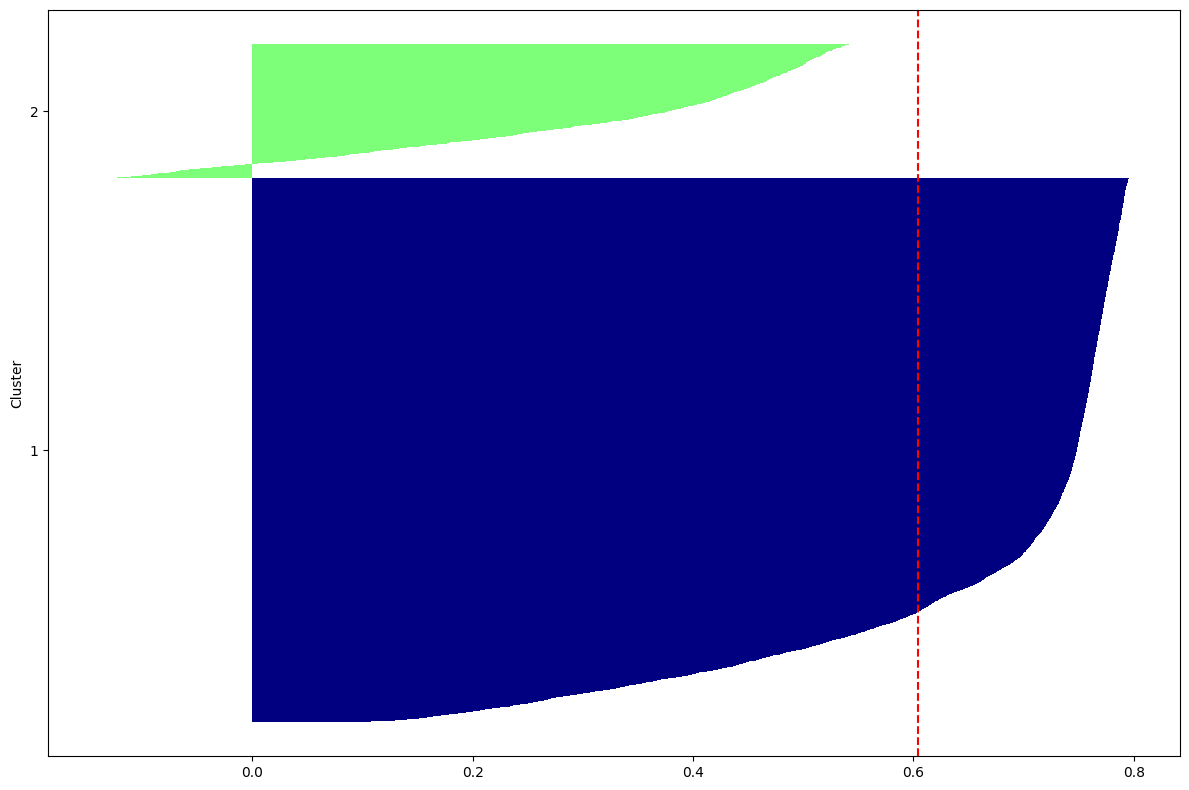

In [37]:
svisualizer(cls,2)

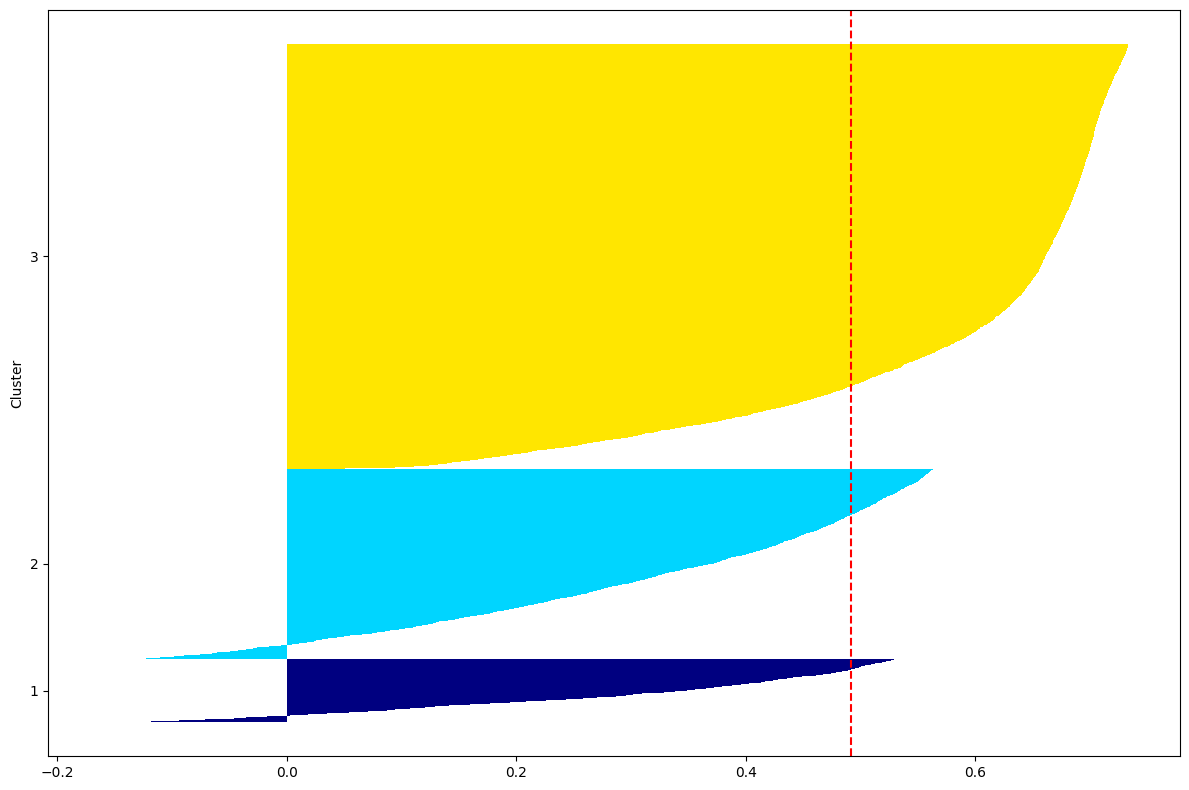

In [38]:
svisualizer(cls,3)

In [39]:
model=KMeans(n_clusters=3,random_state=10)
cluster_kmeans=model.fit_predict(data_encoded_refernce)
data_cluster['kmeans_cluster']=cluster_kmeans
data_cluster.head()

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Price,Bedrooms,Bathrooms,Area,Level,Type_Apartment,Type_Chalet,Type_Duplex,Type_Penthouse,Type_Stand Alone Villa,...,Delivery_Term_Semi Finished,Price_range_Low Price,Price_range_Mid Price,Price_range_high Price,Payment_Option_Cash,Payment_Option_Cash or Installment,Payment_Option_Installment,Payment_Option_Unknown Payment,cluster,kmeans_cluster
0,4000000.0,3.0,3.0,160.0,11.0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,2250000.0,3.0,2.0,165.0,1.0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,2
2,1900000.0,3.0,2.0,230.0,10.0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,2
3,5800000.0,2.0,3.0,160.0,0.0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
4,1844900.0,4.0,3.0,222.0,1.0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,2


In [40]:
df3 = data_cluster.iloc[:,[0,1,2,3,4,5,50]]

In [41]:
df3[['Area','Bathrooms','Bedrooms','Level','Price']].mean()

Area         2.160143e+02
Bathrooms    2.720825e+00
Bedrooms     3.146033e+00
Level        1.315730e+00
Price        3.783341e+06
dtype: float64

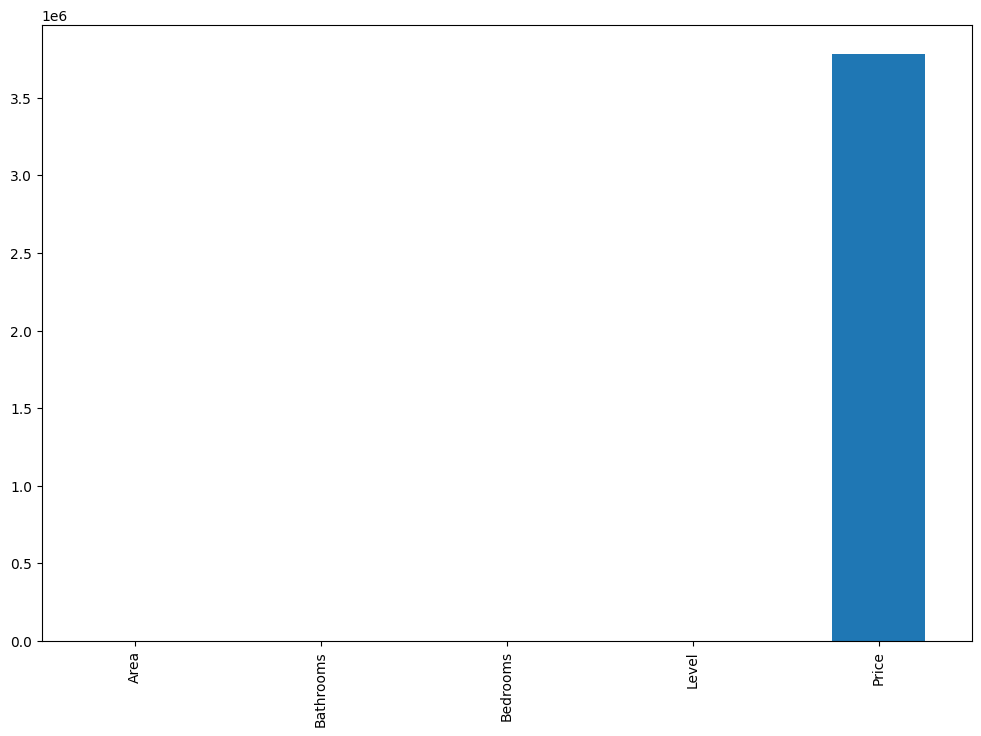

In [42]:
df3[['Area','Bathrooms','Bedrooms','Level','Price']].mean().plot.bar()
plt.show()

In [43]:
def cluster_plot(data, nclusters):
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    X = data.copy()
    cols = list(X.columns)
    km = KMeans(n_clusters=nclusters, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(X)


    # Visualize it:
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=km.labels_.astype(float))

    # plot the centroids
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

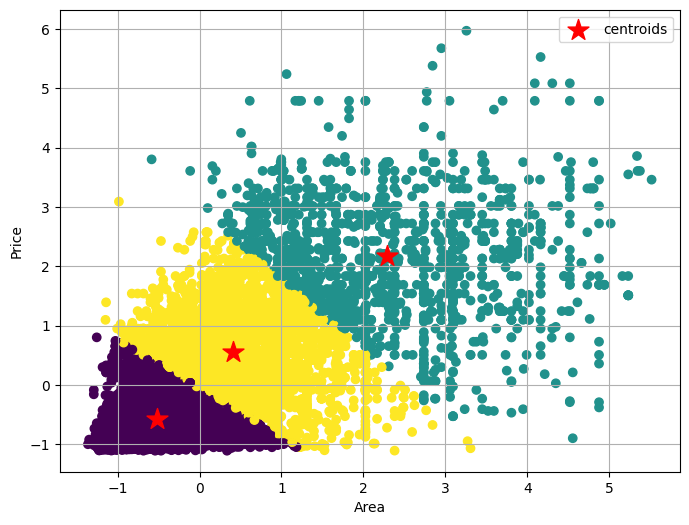

In [44]:
cluster_plot(cls,3)

<a id="DBScan"></a>
### 7.DBSCAN

In [45]:
from sklearn.cluster import DBSCAN

In [46]:
dbscan = DBSCAN(eps=0.25,min_samples=4)

dbscan.fit(cls)

pd.Series(dbscan.labels_).value_counts()

 0    15936
-1       67
 3       19
 1       10
 4        5
 5        5
 6        5
 2        4
 8        4
 7        3
dtype: int64

In [47]:
lbl = pd.Series(dbscan.labels_)
lbl.loc[lbl >= 0] = 0
lbl.value_counts()

 0    15991
-1       67
dtype: int64

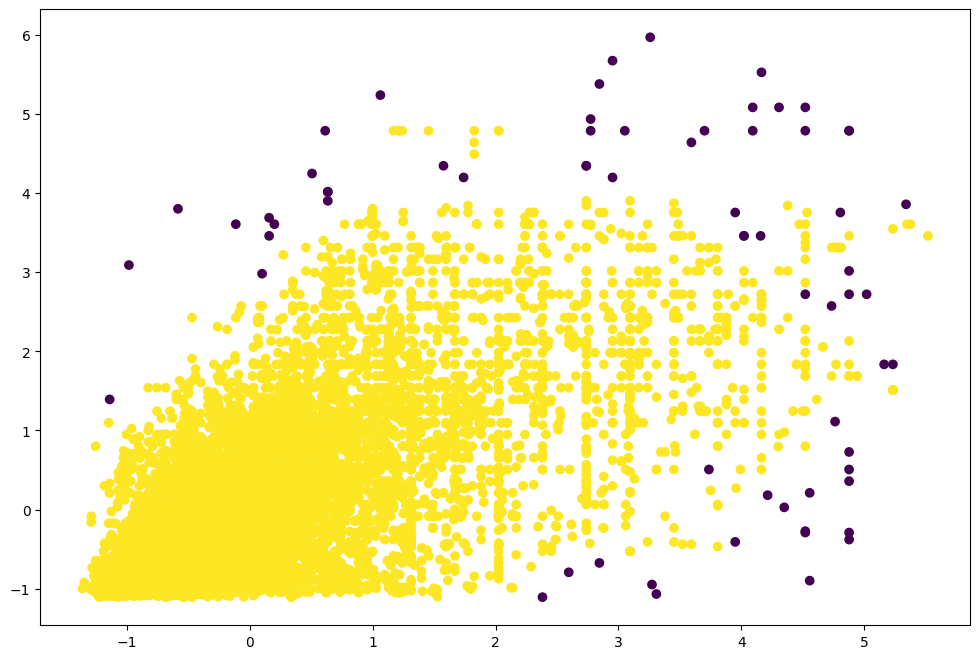

In [48]:
plt.scatter(cls['Area'],cls['Price'],c=lbl)

<a id="PCA"></a>
## 8.Principal Component Analysis(PCA)

In [49]:
from sklearn.decomposition import PCA

In [50]:
d2 = data_num_scaled.drop(['index'],axis=1)

In [51]:
d2.head()

,Price,Bedrooms,Bathrooms,Area,Level
0,0.063972,-0.135322,0.231300,-0.399379,3.730063
1,-0.452745,-0.135322,-0.597211,-0.363729,-0.121609
2,-0.556089,-0.135322,-0.597211,0.099717,3.344896
3,0.595453,-1.061978,0.231300,-0.399379,-0.506776
4,-0.572358,0.791333,0.231300,0.042678,-0.121609


In [52]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(d2)

print(np.cumsum(pca.explained_variance_ratio_*100))

[ 62.33482445  81.38284904  91.33158478  96.37639139 100.        ]


In [53]:
pca=PCA(n_components=2)
pca.fit_transform(d2)

print(pca.explained_variance_ratio_*100)


[62.33482445 19.04802459]


In [54]:
components = pca.components_.T
pd.DataFrame(components,index=d2.columns,columns=['PC1','PC2'])

,PC1,PC2
Price,0.457050,-0.042136
Bedrooms,0.489743,0.177157
Bathrooms,0.515592,0.075346
Area,0.508031,0.107737
Level,-0.165308,0.974451


In [55]:
data_pca=pd.DataFrame(pca.transform(d2),columns=['PC1','PC2'])
data_pca

,PC1,PC2
0,-0.737284,3.582497
1,-0.745800,-0.207583
2,-1.130629,3.224643
3,-0.247811,-0.732656
4,0.286994,0.067831
...,...,...
16053,2.603173,-0.286610
16054,4.197221,-0.121675
16055,4.684741,0.042001
16056,0.542995,-0.388047


In [56]:
model=KMeans(n_clusters=3,random_state=10)
cluster_kmeans=model.fit_predict(data_pca)
data_pca['km_cluster_pca']=cluster_kmeans

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

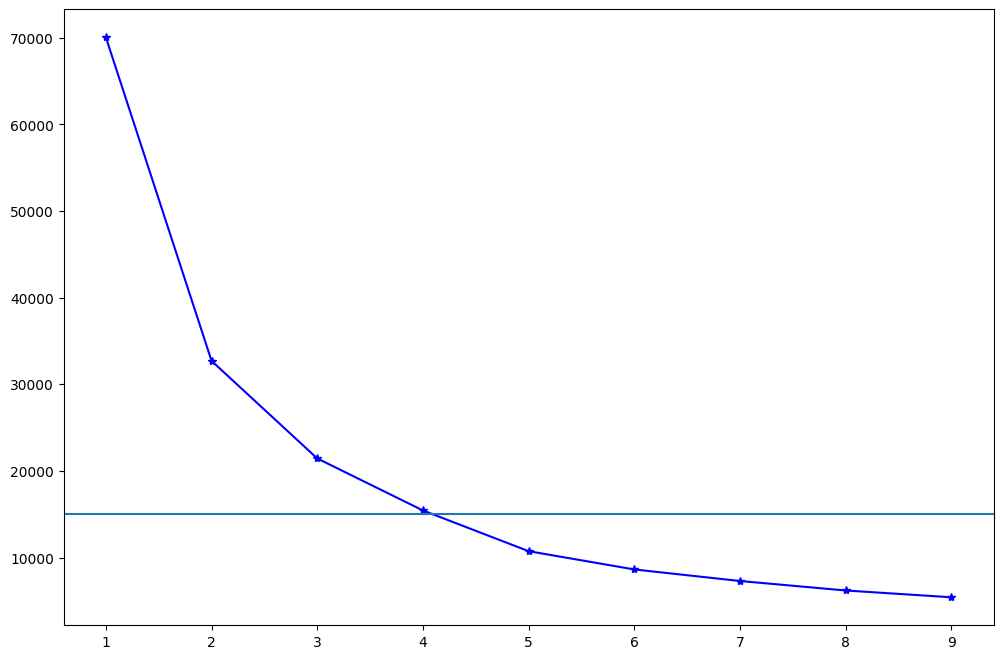

In [57]:
ssd = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(data_pca)
    ssd.append(kmeans.inertia_)

plt.plot(range(1,10),ssd,marker='*',color='b')
plt.axhline(15000)
plt.show()

<Axes: xlabel='PC1', ylabel='PC2'>

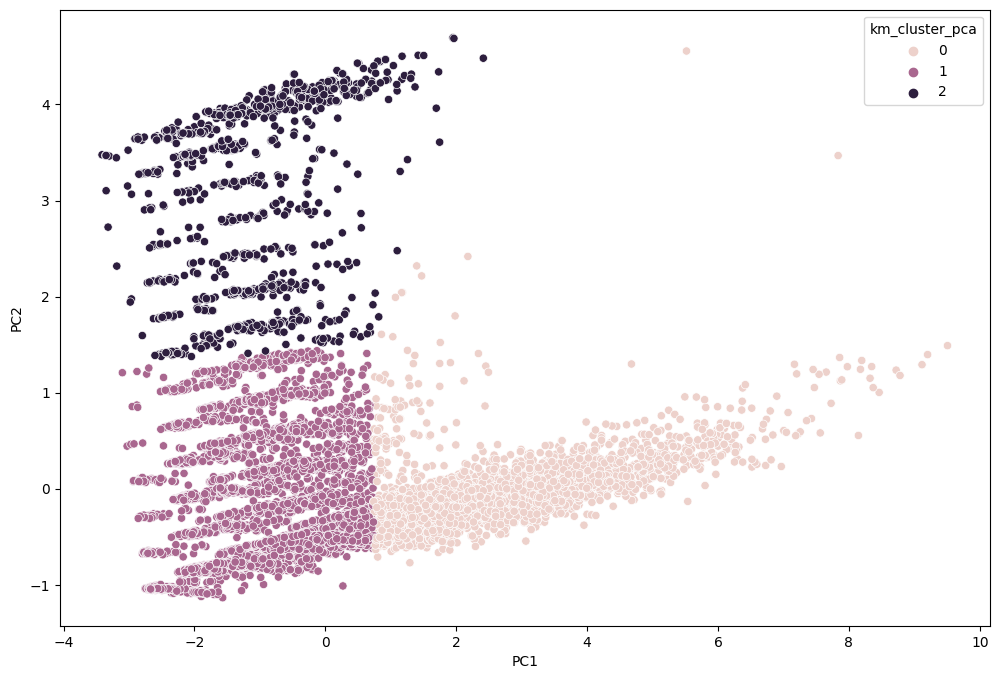

In [58]:
sns.scatterplot(x=data_pca['PC1'],y=data_pca['PC2'],hue=data_pca['km_cluster_pca'])

<a id="RS"></a>
# 9.Recommendation Systems

In [59]:
model=NearestNeighbors(metric='cosine')
model.fit(data_encoded_scaled)

NearestNeighbors(metric='cosine')

In [60]:
selected=7

In [61]:
data_encoded_scaled.iloc[selected].values[0:8]

array([-0.65647955, -0.13532247,  0.2313001 , -0.11418118, -0.50677627,
        1.        ,  0.        ,  0.        ])

In [62]:
dist,index=model.kneighbors(data_encoded_scaled.iloc[selected].values.reshape(1,-1),n_neighbors=6)
index

c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


array([[   7, 3377, 2573, 5668,   66,  876]], dtype=int64)

In [63]:
suggest=[]
for x in index:
    suggest.append(x)
suggest

[array([   7, 3377, 2573, 5668,   66,  876], dtype=int64)]

In [64]:
data_encoded_refernce = data_encoded_refernce.reset_index()
data_encoded_refernce = data_encoded_refernce.drop('index',axis=1)

## Example 1

In [65]:
r=data_encoded_refernce.iloc[[selected]][data_encoded_refernce.iloc[[selected]]>0].dropna(axis=1)
r

,Price,Bedrooms,Bathrooms,Area,Type_Apartment,City_New Cairo - El Tagamoa,Furnished_No,Delivery_Term_Semi Finished,Price_range_Mid Price,Payment_Option_Unknown Payment
7,1560000.0,3.0,3.0,200.0,1,1,1,1,1,1


In [66]:
# Similar Reccomendations
col=r.columns
for x in index:
    suggestions=data_encoded_refernce.iloc[list(x)][col]
suggestions

,Price,Bedrooms,Bathrooms,Area,Type_Apartment,City_New Cairo - El Tagamoa,Furnished_No,Delivery_Term_Semi Finished,Price_range_Mid Price,Payment_Option_Unknown Payment
7,1560000.0,3.0,3.0,200.0,1,1,1,1,1,1
3377,1925750.0,3.0,3.0,199.0,1,1,1,1,1,1
2573,2700000.0,3.0,3.0,170.0,1,1,1,1,1,1
5668,1950000.0,3.0,3.0,200.0,1,1,1,1,1,1
66,1613800.0,3.0,3.0,182.0,1,1,1,1,1,1
876,2575000.0,3.0,3.0,213.0,1,1,1,1,1,1


## Example 2

In [67]:
selected=125

data_encoded_scaled.iloc[selected].values[0:8]

dist,index=model.kneighbors(data_encoded_scaled.iloc[selected].values.reshape(1,-1),n_neighbors=6)
index
suggest=[]
for x in index:
    suggest.append(x)
suggest

c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


[array([ 125, 3500, 2625, 2719, 3210, 2439], dtype=int64)]

In [68]:
r=data_encoded_refernce.iloc[[selected]][data_encoded_refernce.iloc[[selected]]>0].dropna(axis=1)
r

,Price,Bedrooms,Bathrooms,Area,Level,Type_Apartment,City_Zahraa Al Maadi,Furnished_No,Delivery_Term_Finished,Price_range_Low Price,Payment_Option_Cash
125,750000.0,3.0,1.0,112.0,7.0,1,1,1,1,1,1


In [69]:
# Similar Reccomendations
col=r.columns
for x in index:
    suggestions=data_encoded_refernce.iloc[list(x)][col]
suggestions

,Price,Bedrooms,Bathrooms,Area,Level,Type_Apartment,City_Zahraa Al Maadi,Furnished_No,Delivery_Term_Finished,Price_range_Low Price,Payment_Option_Cash
125,750000.0,3.0,1.0,112.0,7.0,1,1,1,1,1,1
3500,1000000.0,3.0,2.0,150.0,4.0,1,1,1,1,1,1
2625,425000.0,3.0,1.0,120.0,8.0,1,0,1,1,1,1
2719,380000.0,3.0,1.0,125.0,8.0,1,0,1,1,1,1
3210,330000.0,3.0,1.0,120.0,7.0,1,0,1,1,1,1
2439,1000000.0,3.0,1.0,106.0,7.0,1,0,1,1,1,1


In [70]:

selected=333

data_encoded_scaled.iloc[selected].values[0:8]

dist,index=model.kneighbors(data_encoded_scaled.iloc[selected].values.reshape(1,-1),n_neighbors=6)
index
suggest=[]
for x in index:
    suggest.append(x)
suggest

c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


[array([ 333,  144,  124, 1405,  123, 1825], dtype=int64)]

In [71]:
r=data_encoded_refernce.iloc[[selected]][data_encoded_refernce.iloc[[selected]]>0].dropna(axis=1)
r

,Price,Bedrooms,Bathrooms,Area,Level,Type_Apartment,City_New Cairo - El Tagamoa,Furnished_No,Delivery_Term_Not Finished,Price_range_Low Price,Payment_Option_Cash or Installment
333,330000.0,3.0,2.0,164.0,2.0,1,1,1,1,1,1


In [72]:
# Similar Reccomendations
col=r.columns
for x in index:
    suggestions=data_encoded_refernce.iloc[list(x)][col]
suggestions

,Price,Bedrooms,Bathrooms,Area,Level,Type_Apartment,City_New Cairo - El Tagamoa,Furnished_No,Delivery_Term_Not Finished,Price_range_Low Price,Payment_Option_Cash or Installment
333,330000.0,3.0,2.0,164.0,2.0,1,1,1,1,1,1
144,330000.0,3.0,2.0,170.0,2.0,1,1,1,1,1,1
124,370000.0,3.0,2.0,157.0,2.0,1,1,1,1,1,1
1405,453000.0,3.0,2.0,180.0,2.0,1,1,1,1,1,1
123,420000.0,3.0,2.0,191.0,2.0,1,1,1,1,1,1
1825,436000.0,3.0,3.0,173.0,2.0,1,1,1,1,1,1


## 7. Model Deployement

In [74]:
from pickle import dump
dump(model,open('recommendation_model.pkl','wb'))